
<center><h1>JSON Exercise</h1> </center>

**Francisco Salas**


Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Load Required libraries

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
ls data

world_bank_projects.json       world_bank_projects_less.json


In [3]:
file_less = 'data/world_bank_projects_less.json'
file_full = 'data/world_bank_projects.json'
df_less = pd.read_json(file_less, ['countryshortname'])
df_full = pd.read_json(file_full)
df_i =pd.read_json(file_full, orient='index')            

## Understand the data 1

- 50 columns with diffrent types
- 500 rows
- several data missing

In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

# Question 1
# Find the 10 countries with most projects

- create a subset
- count values
- plot

In [5]:
df_10 = df_full[['countryshortname','project_name']]  # subset with country and project_name 
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 2 columns):
countryshortname    500 non-null object
project_name        500 non-null object
dtypes: object(2)
memory usage: 11.7+ KB


## Find unique values

From 500 rows, lets find how many unique values

In [6]:
len(df_10.countryshortname.unique())

118

## Create a new column
- Create a new column with the values


Here we create a new column by create group all the countryshortnames and we apply 'count' to add the unique values of each.

In [7]:
df_10['total_projects'] = df_10.groupby('countryshortname').transform('count')
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
countryshortname    500 non-null object
project_name        500 non-null object
total_projects      500 non-null int64
dtypes: int64(1), object(2)
memory usage: 15.6+ KB


/Users/franciscosalas/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_10.head()  # we now have 3 cols, name, project name & total times the country shows up on the list.

,countryshortname,project_name,total_projects
0,Ethiopia,Ethiopia General Education Quality Improvement...,4
1,Tunisia,TN: DTF Social Protection Reforms Support,4
2,Tuvalu,Tuvalu Aviation Investment Project - Additiona...,1
3,"Yemen, Republic of",Gov't and Civil Society Organization Partnership,13
4,Lesotho,Second Private Sector Competitiveness and Econ...,3


## Solution 1:  Top 10 Countries

Create a series with total_projects, show top 10

In [13]:
solution1= df_10.countryshortname.value_counts( dropna=False).head(10)
solution1

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Morocco               12
Bangladesh            12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64

## Solution 1:  Plot

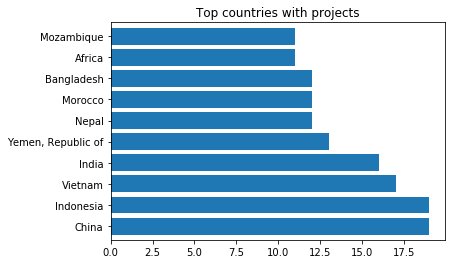

In [16]:
title = 'Top countries with projects'
solution1.plot(kind='barh', title=title, width=0.8)
plt.show()

# Question 2
# Find the top 10 major project themes (using column 'mjtheme_namecode')

- load nested dataframe 
- replace empty rows with nan

In [17]:
json_load = json.load((open('data/world_bank_projects.json')))
df_2 = json_normalize(json_load,'mjtheme_namecode',['mjtheme','project_name'],errors='ignore')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
code            1499 non-null object
name            1499 non-null object
mjtheme         1490 non-null object
project_name    1499 non-null object
dtypes: object(4)
memory usage: 46.9+ KB


In [18]:
df_2.head()

,code,name,mjtheme,project_name
0,8,Human development,[Human development],Ethiopia General Education Quality Improvement...
1,11,,[Human development],Ethiopia General Education Quality Improvement...
2,1,Economic management,"[Economic management, Social protection and ri...",TN: DTF Social Protection Reforms Support
3,6,Social protection and risk management,"[Economic management, Social protection and ri...",TN: DTF Social Protection Reforms Support
4,5,Trade and integration,"[Trade and integration, Public sector governan...",Tuvalu Aviation Investment Project - Additiona...


## Select columns

- only choose the cols we need

In [19]:
#df_2.set_index('countryshortname')
df_2 = df_2[['name','mjtheme', 'project_name']]
df_2.head()

,name,mjtheme,project_name
0,Human development,[Human development],Ethiopia General Education Quality Improvement...
1,,[Human development],Ethiopia General Education Quality Improvement...
2,Economic management,"[Economic management, Social protection and ri...",TN: DTF Social Protection Reforms Support
3,Social protection and risk management,"[Economic management, Social protection and ri...",TN: DTF Social Protection Reforms Support
4,Trade and integration,"[Trade and integration, Public sector governan...",Tuvalu Aviation Investment Project - Additiona...


## Rename columns

In [22]:
df_2.columns = ['project_theme', 'mjtheme', 'project_name']
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 3 columns):
project_theme    1499 non-null object
mjtheme          1490 non-null object
project_name     1499 non-null object
dtypes: object(3)
memory usage: 35.2+ KB


## Replace blank values to `np.nan`

- missing 122

In [23]:
df_2full  = df_2.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)
df_2full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 3 columns):
project_theme    1377 non-null object
mjtheme          1490 non-null object
project_name     1499 non-null object
dtypes: object(3)
memory usage: 35.2+ KB


## Solution 2 : Top 10 major project themes

In [27]:
solution2 = df_2full.project_theme.value_counts( dropna=False).head(10)  # dropna=False to count nan values; NaN  122
solution2

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
NaN                                             122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: project_theme, dtype: int64

## Solutuion 2 :Plot

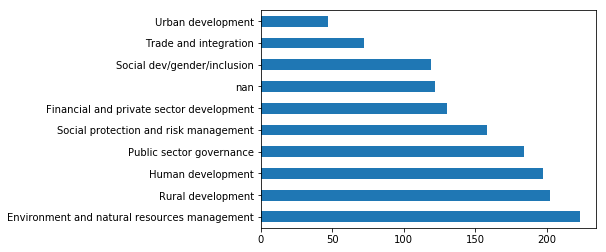

In [28]:
solution2.plot(kind='barh')
plt.show()

# Problem 3

# In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [29]:
solution3 = df_2full[['project_theme', 'mjtheme']]
solution3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
project_theme    1377 non-null object
mjtheme          1490 non-null object
dtypes: object(2)
memory usage: 23.5+ KB


In [ ]:
#solution3



In [30]:
 solution3.groupby(['project_theme']).count()

,mjtheme
project_theme,
Economic management,33
Environment and natural resources management,223
Financial and private sector development,130
Human development,197
Public sector governance,184
Rule of law,12
Rural development,202
Social dev/gender/inclusion,119
Social protection and risk management,158
